![logos](https://i.ytimg.com/vi/a3tl5jcvGIU/maxresdefault.jpg)

**Processamento de Linguagem Natural (em inglês Natural Language Processing)** é a parte central de nossas vidas no dia a dia e pode ser usado para resolver problemas relacionados a linguagem. O Processamento de Linguagem Natural (PLN daqui em diante) é um campo da ciência da computação, inteligência artificial e computação linguística cujo foco está na interação entre computadores e linguagem (natural) humana. <p>São muitos os desafios envolvidos em fazer o computador compreender o significado na geração de linguagem natural. Essencialmente, PLN é a aplicação de aspectos teóricos da linguagem a aplicações de computador.<p>
    [Fonte](http://datascienceacademy.com.br/blog/processamento-de-linguagem-natural-python-nltk/)


In [ ]:
#http://minerandodados.com.br/index.php/2017/06/22/mineracao-de-textos-7-tecnicas/
#http://datascienceacademy.com.br/blog/processamento-de-linguagem-natural-python-nltk/

In [2]:
!pip install wordcloud

In [3]:
# iniciando como sempre ... com o import das bibliotecas que usaremos
import nltk
import re
from nltk.corpus import wordnet
from wordcloud import WordCloud

**Operações com Python**

In [5]:
frase1 = 'Python eh uma linguagem fenomenal'; frase1

'Python eh uma linguagem fenomenal'

In [46]:
frase2 = ' para qualquer cientista de dados!';frase2

' para qualquer cientista de dados!'

In [47]:
frase3 = ' Além do aprendizado ser simples, é fácil.';frase3

' Além do aprendizado ser simples, é fácil.'

In [48]:
frase1 + frase2 + frase3

'Python eh uma linguagem fenomenal para qualquer cientista de dados! Além do aprendizado ser simples, é fácil.'

In [49]:
frase2[0:15]

' para qualquer '

In [50]:
frase3[1:20]

'Além do aprendizado'

In [51]:
frase1[14:35]

'linguagem fenomenal'

**Objeto String**

In [52]:
len(frase1)

33

In [53]:
len(frase2)

34

In [54]:
frase2 = frase2.lower()
frase2

' para qualquer cientista de dados!'

In [55]:
len(frase3)

42

In [56]:
frase3 = frase2.upper()
frase3

' PARA QUALQUER CIENTISTA DE DADOS!'

**Varrer STRINGS**

In [57]:
frase1.index('linguagem')

14

In [58]:
frase1[14:35]

'linguagem fenomenal'

![logos](https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Metallica_Live_at_The_O2%2C_London%2C_England%2C_22_October_2017.jpg/800px-Metallica_Live_at_The_O2%2C_London%2C_England%2C_22_October_2017.jpg)

In [3]:
banda = ['James Hetfield','Lars Ulrich'] + ['Kirk Hammett','Robert Trujillo']

In [4]:
banda

['James Hetfield', 'Lars Ulrich', 'Kirk Hammett', 'Robert Trujillo']

In [5]:
musicas = ['Enter Sandman','Nothing Else Matters','Master of Puppets'] + ['Fight Fire With Fire']

In [6]:
musicas

['Enter Sandman',
 'Nothing Else Matters',
 'Master of Puppets',
 'Fight Fire With Fire']

**Join**

In [59]:
lista = ['hot','dog']
' '.join(lista)


'hot dog'

**Trabalhando com a NLTK**

![logos](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/01/NLP_Abstract_BG_1200X800_02.jpg)

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucasbarros\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [63]:
frase = 'Iron Maiden eh uma Banda Incrível'
palavras = nltk.word_tokenize(frase); palavras

['Iron', 'Maiden', 'eh', 'uma', 'Banda', 'Incrível']

In [64]:
from nltk import FreqDist
frequencia = FreqDist(['six','six','six','Iron Maiden','the','Best','Iron Maiden','forever'])
frequencia

FreqDist({'six': 3, 'Iron Maiden': 2, 'the': 1, 'Best': 1, 'forever': 1})

In [65]:
print (frequencia.values())

dict_values([3, 2, 1, 1, 1])


In [66]:
frequencia.max()

'six'

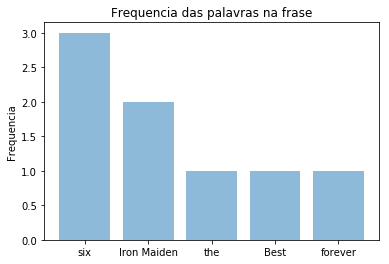

In [71]:
import numpy as np
import matplotlib.pyplot as plt

palavras = frequencia.keys()
y_pos = np.arange(len(palavras))
contagem = frequencia.values()

plt.bar(y_pos, contagem, align='center', alpha=0.5)
plt.xticks(y_pos, palavras)
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')

plt.show()


**Pre Processing**

** Expressões reculares**

In [73]:
texto = 'Av. Paulitsta nº 900, andar 4 cjto 402'
re.sub('[-|0-9]',' ', texto)

'Av. Paulitsta nº    , andar   cjto    '

In [74]:
texto = "i'm back baby!!!, Data Science ??;;;()"
re.sub(r'[-./?!,":;()\']',' ',texto)

'i m back baby     Data Science        '

**Stemming**

In [76]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucasbarros\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

In [77]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('frequentemente')
stemmer.stem('copiar')

'copi'

In [78]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))


In [79]:
Stemming('Ele trabalhava frequentemente no projeto de criacao de novos produtos')

'ele trabalh frequ no projet de criaca de nov produt'

In [118]:
Stemming('Iron Maiden eh uma Banda Incrível')

'iron maiden eh uma band incr'

**Stopwords**

**Stopword** nada mais é que uma palavra que possui apenas significado sintático dentro da sentença, porém não traz informações relevantes sobre o seu sentido. <p> As stopwords possuem uma frequência muito grande em todos os idiomas e por esse motivo precisamos eliminá-las das palavras que extraímos do texto. Caso contrário, nosso algoritmo poderia dar importância para palavras como: “e”, “ou”, “para”….e isso certamente atrapalharia nossa análise.<p>
    fonte: [Link](https://medium.com/@viniljf/utilizando-processamento-de-linguagem-natural-para-criar-um-sumariza%C3%A7%C3%A3o-autom%C3%A1tica-de-textos-775cb428c84e)

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucasbarros\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [82]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [83]:
stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'es

In [84]:
def RemoviStopWords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [117]:
RemoviStopWords('Ola mundo, estou ouvindo música do Iron Maiden no Spotify hoje o dia todo')

'ola mundo, ouvindo música iron maiden spotify hoje dia todo'

**Trabalhando com Wordnet**

In [90]:
#download do wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lucasbarros\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [92]:
from nltk.corpus import wordnet
wordnet.synsets('music')


[Synset('music.n.01'),
 Synset('music.n.02'),
 Synset('music.n.03'),
 Synset('music.n.04'),
 Synset('music.n.05')]

In [95]:
wordnet.synset('music.n.01').definition()

'an artistic form of auditory communication incorporating instrumental or vocal tones in a structured and continuous manner'

In [97]:
wordnet.synset('music.n.02').definition()

'any agreeable (pleasing and harmonious) sounds'

In [98]:
wordnet.synset('music.n.01').hyponyms()

[Synset('antiphony.n.01'),
 Synset('bach.n.02'),
 Synset('ballet.n.02'),
 Synset('beethoven.n.02'),
 Synset('brahms.n.02'),
 Synset('chopin.n.01'),
 Synset('dance_music.n.02'),
 Synset('gilbert_and_sullivan.n.01'),
 Synset('handel.n.02'),
 Synset('harmony.n.02'),
 Synset('haydn.n.02'),
 Synset('instrumental_music.n.01'),
 Synset('monophony.n.01'),
 Synset('mozart.n.02'),
 Synset('music_genre.n.01'),
 Synset('musical_composition.n.01'),
 Synset('overture.n.01'),
 Synset('part_music.n.01'),
 Synset('pizzicato.n.01'),
 Synset('polyphony.n.01'),
 Synset('polytonality.n.01'),
 Synset('popularism.n.01'),
 Synset('prelude.n.02'),
 Synset('refrain.n.01'),
 Synset('section.n.01'),
 Synset('serialism.n.01'),
 Synset('stravinsky.n.02'),
 Synset('syncopation.n.03'),
 Synset('ta'ziyeh.n.01'),
 Synset('tune.n.01'),
 Synset('vocal_music.n.01'),
 Synset('wagner.n.03')]

In [100]:
wordnet.synset('music.n.02').hyponyms()

[Synset('music_of_the_spheres.n.01')]

In [99]:
wordnet.synset('music.n.02').hypernyms()

[Synset('sound.n.02')]

In [101]:
wordnet.synset('music.n.03').part_meronyms()

[Synset('beats_per_minute.n.01')]

**Sentiwordnet**

In [104]:
# download do sentiwordnet
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\lucasbarros\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


True

In [102]:
from nltk.corpus import sentiwordnet as swn

In [105]:
print (swn.senti_synset('love.n.01'))

<love.n.01: PosScore=0.625 NegScore=0.0>


In [106]:
print (swn.senti_synset('sad.a.01'))

<sad.a.01: PosScore=0.125 NegScore=0.75>


**Part of Speech**

In [108]:
# downlod do averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucasbarros\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [111]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lucasbarros\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [109]:
text = nltk.word_tokenize("Hi, my name is Lucas, I want to print the ticket for payment")
nltk.pos_tag(text)



[('Hi', 'NNP'),
 (',', ','),
 ('my', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('Lucas', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('print', 'VB'),
 ('the', 'DT'),
 ('ticket', 'NN'),
 ('for', 'IN'),
 ('payment', 'NN')]

In [112]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [113]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [114]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [119]:
text = nltk.word_tokenize("Minha bike apesar de antiga, é ótima")
nltk.pos_tag(text)

[('Minha', 'NNP'),
 ('bike', 'NN'),
 ('apesar', 'NN'),
 ('de', 'IN'),
 ('antiga', 'FW'),
 (',', ','),
 ('é', 'FW'),
 ('ótima', 'NN')]

In [116]:
text = nltk.word_tokenize("Metallica também é outra banca incrível!")
nltk.pos_tag(text)

[('Metallica', 'NNP'),
 ('também', 'NN'),
 ('é', 'NNP'),
 ('outra', 'VBZ'),
 ('banca', 'JJ'),
 ('incrível', 'NN'),
 ('!', '.')]

![logos](https://www.africarising.tv/wp-content/uploads/2017/10/Dusty-video-animation-of-complete-computer-hacking-and-security-concept.jpg)